In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
data = pd.read_csv('column_2C_weka.csv')


In [230]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


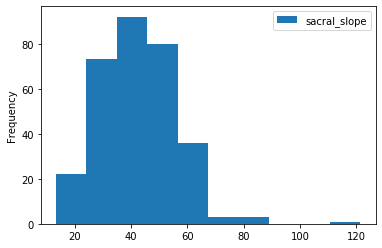

In [231]:
data.plot(kind='hist',x='pelvic_incidence',y='sacral_slope',bins=10)

In [232]:
data['sacral_slope'].mean()

42.95383096141936

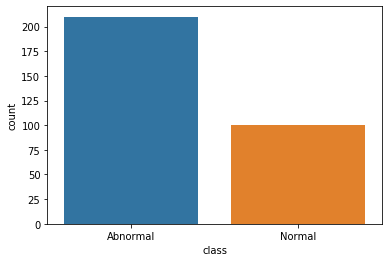

In [233]:
sns.countplot(x='class',data=data)

In [234]:
data.loc[0:,'class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [235]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


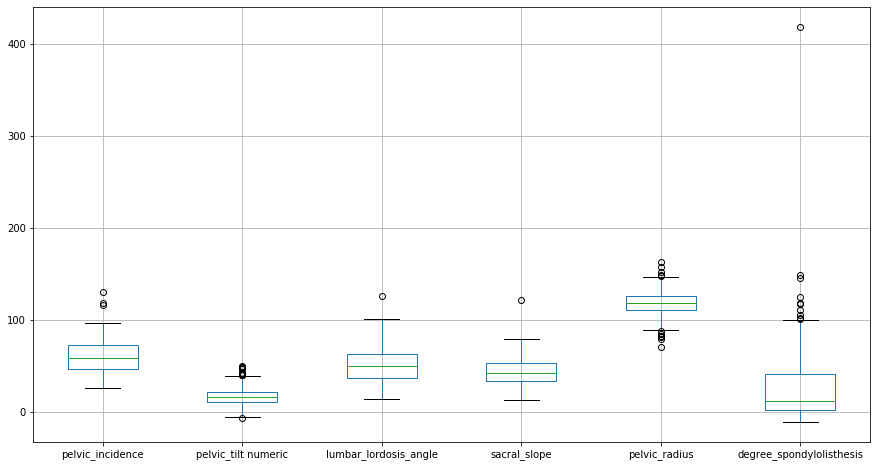

In [236]:
data.boxplot(figsize=((15,8)))

In [237]:
data['degree_spondylolisthesis'].max()-data['degree_spondylolisthesis'].min()

429.60126076000006

In [238]:
data['degree_spondylolisthesis'].mean()

26.296694437867743

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


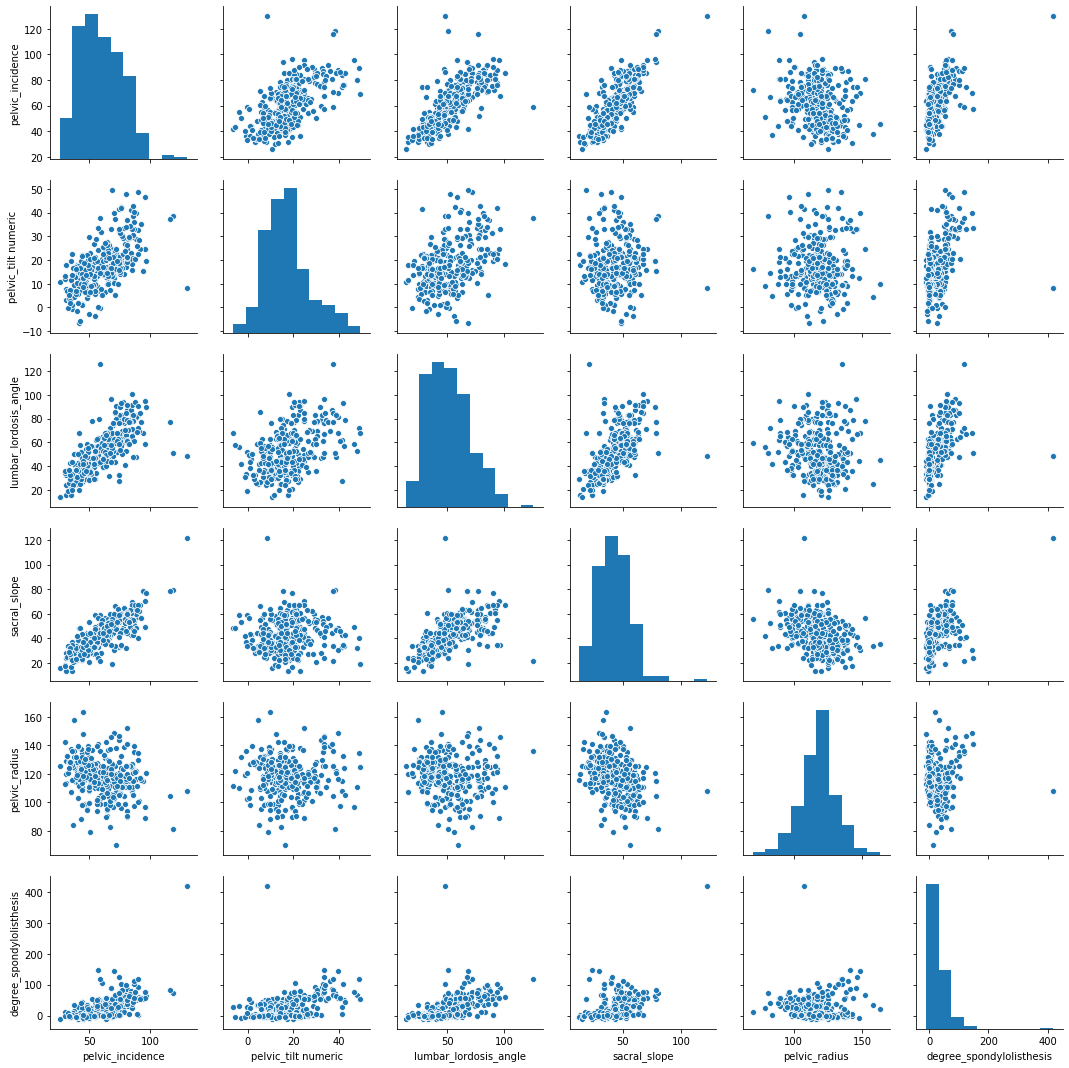

In [240]:
sns.pairplot(data)

In [241]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn=KNeighborsClassifier(n_neighbors=3)
x,y=data.loc[:,data.columns!='class'],data.loc[:,'class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [242]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [243]:
prediction=knn.predict(x_test)

In [244]:
print("The accuracy is :",knn.score(x_test,y_test))

The accuracy is : 0.8602150537634409


Text(0, 0.5, 'Accuracy')

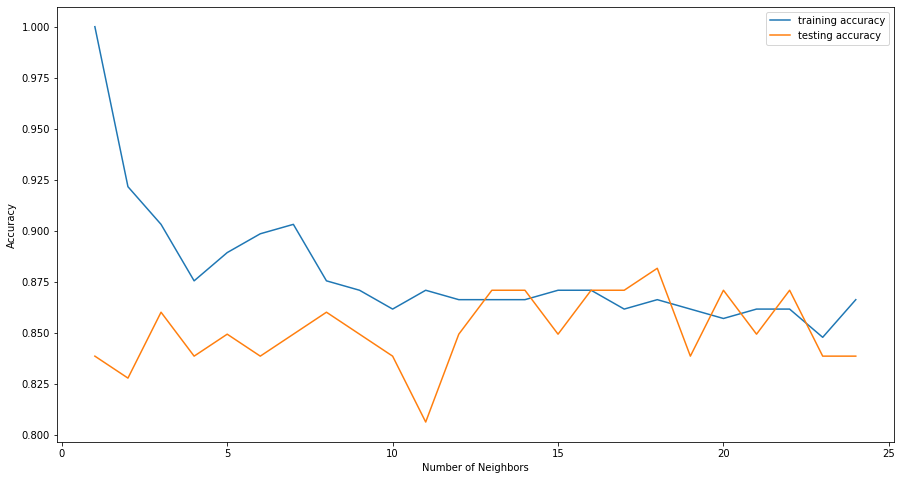

In [245]:
neigh=np.arange(1,25)
train_accuracy=[]
test_accuracy=[]
for i,k in enumerate(neigh):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction=knn.predict(x_test)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))
plt.figure(figsize=(15,8))
plt.plot(neigh,train_accuracy,label='training accuracy')
plt.plot(neigh,test_accuracy,label='testing accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

In [246]:
test_accuracy[17]

0.8817204301075269

In [247]:
train_accuracy[17]

0.8663594470046083

In [248]:
test_accuracy.index(np.max(test_accuracy))

17

In [249]:
data1=data[['pelvic_incidence','sacral_slope']]

In [250]:
data1

,pelvic_incidence,sacral_slope
0,63.027818,40.475232
1,39.056951,28.995960
2,68.832021,46.613539
3,69.297008,44.644130
4,49.712859,40.060784
5,40.250200,26.328293
6,53.432928,37.568592
7,45.366754,34.611142
8,43.790190,30.256437
9,36.686353,31.675469


In [251]:
data1.shape

(310, 2)

In [252]:
data1=pd.DataFrame(data1)

In [253]:
data1.reshape()

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
data1=np.array(data1)

In [ ]:
data1.shape

In [ ]:
x=np.array(data.loc[:,'pelvic_incidence']).reshape(-1,1)

In [ ]:
y=np.array(data.loc[:,'sacral_slope']).reshape(-1,1)

In [ ]:
plt.figure(figsize=[10,10])

In [ ]:
plt.scatter(x,y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
reg.fit(x,y)
predicted=reg.predict(predict_space)

In [ ]:
print("Score",reg.score(x,y))

In [ ]:
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
reg=LinearRegression()
cvs=cross_val_score(reg,x,y,cv=5)

In [ ]:
np.mean(cvs)

In [ ]:
from sklearn.linear_model import Ridge
x = np.array(data.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size = 0.4)
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(x_train,y_train)
score=ridge.score(x_test,y_test)
print(score*100)
print(ridge.coef_)

In [ ]:
from sklearn.linear_model import Lasso
x = np.array(data.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size = 0.4)
lasso=Lasso(alpha=0.1,normalize=True)
lasso.fit(x_train,y_train)
score=lasso.score(x_test,y_test)
print(score*100)

In [ ]:
print(lasso.coef_)

In [ ]:
figsize=(10,5)
sns.heatmap(data.corr(),annot=True)
plt.show()

In [272]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y=data.loc[:,data.columns!='class'],data.loc[:,'class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
rf=RandomForestClassifier(random_state=4,max_depth=5)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[56 10]
 [ 6 21]]
              precision    recall  f1-score   support

    Abnormal       0.90      0.85      0.88        66
      Normal       0.68      0.78      0.72        27

    accuracy                           0.83        93
   macro avg       0.79      0.81      0.80        93
weighted avg       0.84      0.83      0.83        93



C:\Users\800410\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [275]:
from sklearn.model_selection import GridSearchCV
grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=3)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [276]:
knn_cv.best_params_

{'n_neighbors': 12}

In [277]:
knn_cv.best_score_

0.8571428571428571

In [278]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [279]:
knn_cv.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [280]:
data = pd.read_csv('column_2C_weka.csv')


In [283]:
data=pd.get_dummies(data)

In [284]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


In [286]:
data.drop(columns='class_Abnormal',inplace=True)

In [289]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [293]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps=[('scalar',StandardScaler()),('SVM',SVC())]
parameters={'SVM__C':[1,10,100],'SVM__gamma':[0.1, 0.01]}
pipeline=Pipeline(steps)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv=GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)
y_pred=cv.predict(x_test)

In [294]:
cv.score(x_test,y_test)

0.8548387096774194

In [295]:
cv.best_params_

{'SVM__C': 100, 'SVM__gamma': 0.01}